In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/news.csv')

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
df['label'].value_counts()

,count
label,
REAL,3171
FAKE,3164


In [ ]:
from ipywidgets import Label
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
df.duplicated().sum()

np.int64(0)

<function matplotlib.pyplot.show(close=None, block=None)>

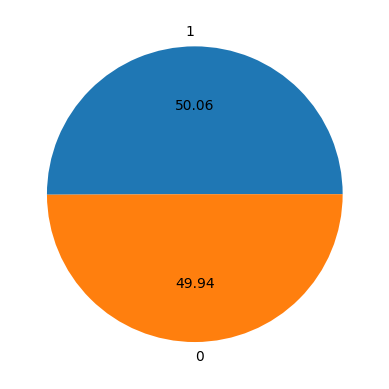

In [ ]:
plt.pie(df['label'].value_counts(),labels=[1,0],autopct='%0.2f')
plt.show

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,Unnamed: 0,title,text,label,transformed_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journal fellow free...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,googl pinterest digg linkedin reddit stumbleup...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,secretari state john kerri said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kayde king kaydeek novemb 9 2016 lesson tonigh...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,primari day new york hillari clinton donald tr...


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
fake_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=""))

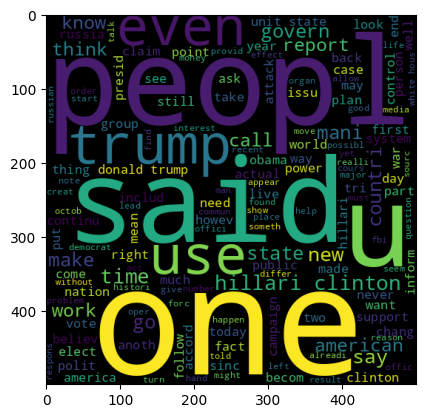

In [ ]:
plt.imshow(fake_wc)

In [ ]:
Real_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=""))

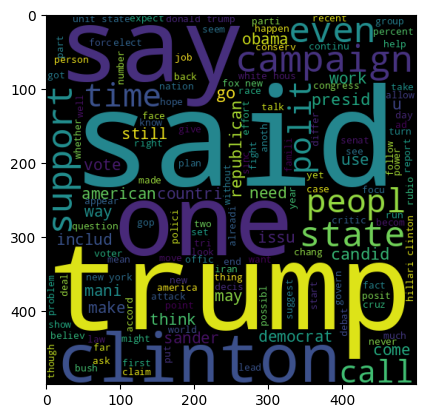

In [ ]:
plt.imshow(Real_wc)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['transformed_text'],df['label'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
x_train

,transformed_text
5642,senat vote wednesday clear path fund dh republ...
5786,hillari clinton histor moment final arriv tues...
2030,dakota access pipelin protest occupi hillari c...
285,print feel strongli suprem court need stand si...
6266,tuesday 8 novemb 2016 clinton listen trump con...
...,...
4931,37 corpor nomin prestigi state depart award si...
3264,piec luggag human remain wreckag could oil sli...
1653,0 add comment immedi aftermath donald trump sh...
2607,palestin palestinian check flat amjad aliwi is...


In [ ]:
y_train

,label
5642,1
5786,1
2030,0
285,0
6266,0
...,...
4931,1
3264,1
1653,0
2607,0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [ ]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
rf_pred=rf_classifier.predict(x_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[831, 102],
       [ 90, 878]])

In [ ]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.8990005260389269

In [ ]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       933
           1       0.90      0.91      0.90       968

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



In [1]:
# Predict a real message
rf_classifier.predict(["i wnt u to marry me"])

NameError: name 'rf_classifier' is not defined